# Welcome to data visualization 101!

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# matplotlib로 그려지는 그림이 새로운 창이 아니라 ipython notebook 상에 출력되도록 함
%matplotlib inline

# Iris data visualization
- scatter plot
- histogram

target names : ['setosa' 'versicolor' 'virginica']
features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


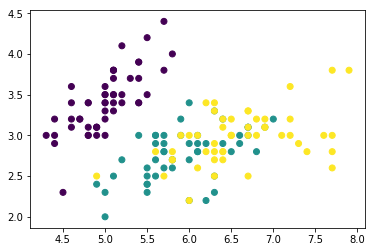

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

# iris 꽃의 종류
print('target names :', iris['target_names'])

# 꽃 하나하나가 가지고 있는 특성
print('features :', iris['feature_names'])

# iris 데이터를 data에 저장
data = iris['data']

# 총 4개의 특징(feature) 중 sepal length, sepal width만 사용
# X : 2차원 데이터 추출
# y : iris 종류 (0: iris setosa, 1: iris versicolor, 2: iris virginica)
X = data[:,:2]
y = iris['target']

# scatter plot : (x, y)의 한 데이터가 한 점을 이루게 하는 plotting 기법
# x-axis : matrix X의 첫 번째 column
# y-axis : matrix X의 두 번째 column
# y : iris 종류에 대한 데이터 (0, 1, 2)에 따라 점의 색깔이 달라지게 한다
plt.scatter(X[:,0],X[:,1], c=y)

# 실제로 화면에 보여지게 하는 부분
plt.show()

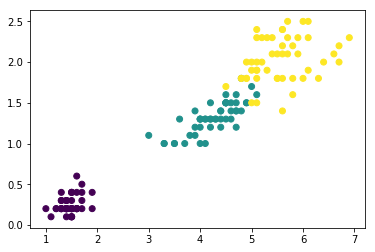

In [7]:
X = data[:, 2:]
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

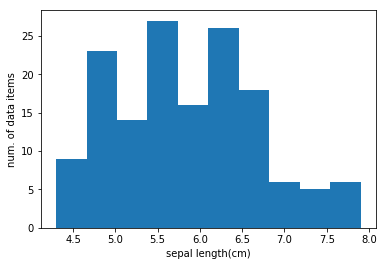

In [8]:
# histogram
# input data : data[:,0], sepal length
# align='mid' : 가운데 정렬
plt.hist(data[:,0], align='mid')

# x축, y축에 라벨 붙이기
plt.xlabel('sepal length(cm)')
plt.ylabel('num. of data items')
plt.show()

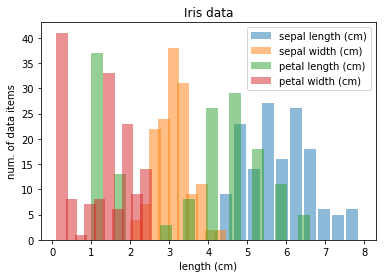

In [9]:
# alpha 값으로 투명도 조절 가능
# label로 해당 데이터에 이름을 붙일 수 있음
plt.hist(data[:,0], align='mid', alpha=0.5, width=0.3, label=iris['feature_names'][0])
plt.hist(data[:,1], align='mid', alpha=0.5, width=0.3, label=iris['feature_names'][1])
plt.hist(data[:,2], align='mid', alpha=0.5, width=0.3, label=iris['feature_names'][2])
plt.hist(data[:,3], align='mid', alpha=0.5, width=0.3, label=iris['feature_names'][3])

# title로 타이틀을 정할 수 있음
plt.title('Iris data')
plt.xlabel('length (cm)')
plt.ylabel('num. of data items')

# legend : 데이터 범례, 레이블 이름을 오른쪽 상단에 출력해줌
plt.legend()
plt.show()

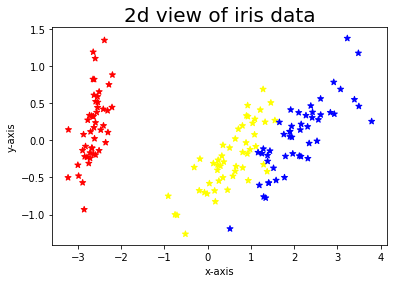

In [10]:
# sklearn 라이브러리에서 PCA 임포트
from sklearn.decomposition import PCA

# 2차원으로 축소시켜줄 것이므로 component의 갯수를 2로 함
pca = PCA(n_components=2)
pca.fit(data)

# fit_transform을 통해 2차원으로 축소된 데이터 얻음
data_2d = pca.fit_transform(data)

# color : 색을 임의로 지정해 줄 수 있음
# marker : 점의 모양을 변화시킬 수 있음
# s : 마커(점)의 크기
color = ['red','yellow','blue']
plt.scatter(data_2d[:,0], data_2d[:,1], c=[color[item] for item in y], marker='*', s=40)
plt.title('2d view of iris data', size=20)
plt.xlabel('x-axis', size=10)
plt.ylabel('y-axis', size=10)
plt.show()

# Flights data
- heatmap

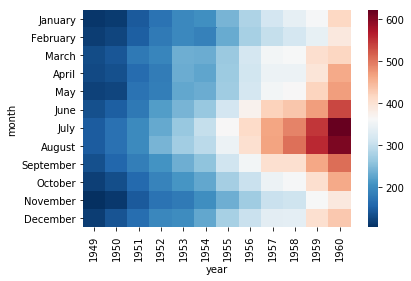

In [11]:
# seaborn heatmap
# seaborn 내장되어있는 비행 데이터셋 받음
flights = sns.load_dataset("flights")

# seaborn에서는 matplotlib와 달리 pivot으로 한꺼번에 레이블을 붙일 수 있음
# 데이터셋에 x축, y축, 값에 대한 레이블 내장시킴
flights = flights.pivot("month","year","passengers")

# heatmap을 통해서 flight 데이터 셋 시각화
# camp : 히트맵 색 변경하기
ax = sns.heatmap(flights, cmap="RdBu_r")

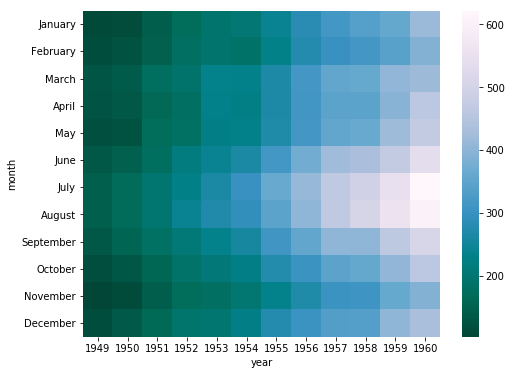

In [12]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month","year","passengers")

# matplotlib와 seaborn 동시에 사용 가능
plt.figure(figsize=(8,6))
# heatmap을 통해서 flight 데이터 셋 시각화
# camp : 히트맵 색 변경하기
ax = sns.heatmap(flights, cmap="PuBuGn_r")